# $\color{blue}{\text{TP 2 IIA : Regression linéaire}}$

## <font color="#1abc9c">Introduction</font>

**Objectifs du TP :**

Mise en oeuvre de la régression linéaire. L'objectif est de faire le lien entre ce que calcule et retourne le modèle 'LinearRegression' de scikit-learn (la 'pratique'), et ce qui a été vu en cours (la 'théorie') : équation du modèle, paramètres, apprentissage des paramètres, évaluation du modèle.



In [1]:
# importation des librairies nécéssaires
# pour calcul numerique, chargement des données, visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tpiia_utils

# fonctions de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## <font color="#1abc9c">1. Régression linéaire univariée</font>

Nous commencons par la régression linéaire simple (une seule variable) avant d'aborder la régression linéaire multivariée (plusieurs variables).

### 1.1 Chargement et analyse des données

On s'intéresse au problème suivant : imaginez que vous voulez savoir si vous payez trop cher votre loyer. Vous avez récupéré sur un site de location le prix des locations disponibles, ainsi que la surface associée. Bien sûr, en réalité d’autres paramètres seraient probablement à prendre en compte (parties communes, voisinage, évolution des loyers au cours du temps, etc), mais on appréhende ici un modèle simplifié.

La question à résoudre est : "Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?"

La seule caractéristique dont nous disposons est la surface de l'appartement. L'ensemble labelisé dont nous disposons a été collecté sur des sites immobiliers parisiens et est composé de N observations de surface et des loyers associés, enregistrées dans le fichier 'house.csv'.

In [2]:
house_df=pd.read_csv('./data/house.csv', sep=',')

# Affichage des 5 premieres lignes du dataframe
house_df.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


La première chose à faire est d'analyser les données. On ré-utilise les outils vus au premier TP.

In [3]:
print("Résumé des données")
house_df.info()
print("\n Statistiques")
print(house_df.describe())

Résumé des données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   loyer    545 non-null    int64
 1   surface  545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB

 Statistiques
              loyer     surface
count    545.000000  545.000000
mean    2307.502752   63.236697
std     2201.364353   48.716475
min      488.000000   11.000000
25%     1255.000000   32.000000
50%     1795.000000   50.000000
75%     2600.000000   76.000000
max    25000.000000  415.000000


<font color="red">**Question 1:**</font>
- Combien y'a-t-il d'exemples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(m)}$ dans le jeu de données ?
- Quelle est la variable cible $y$ ?
- Combien y'a-t-il d'attributs $x_1, x_2,...x_d$ ? 

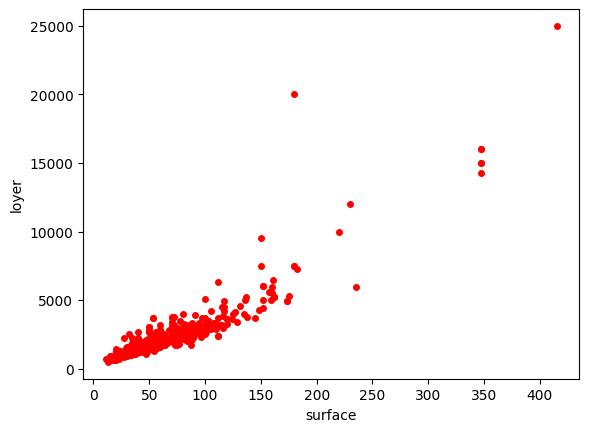

In [4]:
# Affichage des données
plt.plot(house_df['surface'], house_df['loyer'], 'ro', markersize=4)
plt.xlabel(house_df['surface'].name)
plt.ylabel(house_df['loyer'].name)
plt.show()


Clairement, d'après la visualisation, on peut se dire que le montant du loyer dépend de manière linéaire de la surface du logement. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite. 

Aussi, on peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir modélisables moins facilement, il y a plus de variabilité. 

### 1.2 Apprentissage du modèle de régression linéaire

La classe '<code>LinearRegression()</code>' implémente la régression linéaire dans scikit-learn. Pour l'appliquer, il faut au préalable :
- formater les données labélisées dont nous disposons en matrice des attributs $X$ et vecteur des labels $y$
- former l'ensemble d'apprentissage et l'ensemble de test

In [5]:
# Define the X (input) and y (target) features
X = house_df.drop('loyer', axis=1)
y = house_df['loyer']

print(y.shape)

(545,)


In [9]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)

print(X_train.shape)
print(X_test.shape)

(365, 1)
(180, 1)


<font color="red">**Question 2:**</font> Quelle est la taille de l'ensemble d'apprentissage ? de l'ensemble de test ?

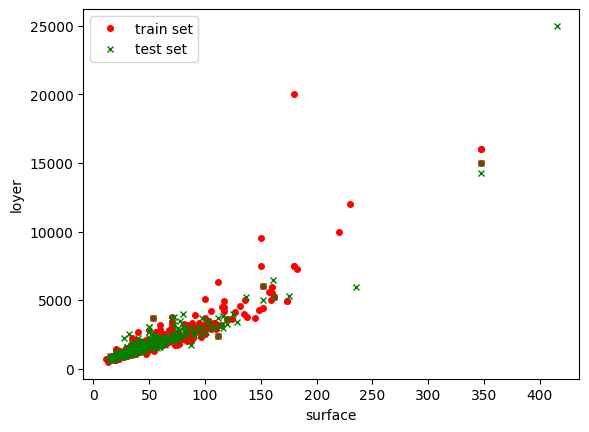

In [10]:
# Affichage ensemble d'apprentissage et ensemble de test
plt.plot(X_train, y_train, 'ro', markersize=4, label='train set')
plt.plot(X_test, y_test, 'gx', markersize=4, label='test set')
plt.xlabel(house_df['surface'].name)
plt.ylabel(house_df['loyer'].name)
plt.legend(loc='upper left')
plt.show()

La fonction '<code>fit()</code>' réalise l'apprentissage. Le modèle résultant est stocké dans la variable 'lreg_model1', dont le nom est arbitrairement choisi.

In [11]:
# apprentissage du modèle
lreg_model1=LinearRegression()
lreg_model1.fit(X_train, y_train)
print("Estimated coefficients :",lreg_model1.coef_)
print("Independent term in the linear model :",lreg_model1.intercept_)

Estimated coefficients : [40.38978202]
Independent term in the linear model : -254.78202881048355


<font color="red">**Question 3:**</font> Rappelez l'équation du modèle dans notre cas (univarié). Combien de coefficients (paramètres) doivent être estimés ?

<font color="red">**Question 4:**</font> De la minimisation de quelle fonction ces paramètres sont-ils solution ? Rappelez comment la solution de cette équation (et donc la valeur des paramètres) peut être trouvée.

<font color="red">**Question 5:**</font> A l'issue de l'apprentissage, quelle est la valeur de ces paramètres ?

<font color="red">**Question 6:**</font> Calculez "à la main" (vous pouvez utliser la console python quand même) la valeur prédite par le modèle pour une surface de 35 mètres carrés. Vous détaillerez le calcul.


In [12]:
lreg_model1.coef_[0] * 35 + lreg_model1.intercept_

1158.8603418415307

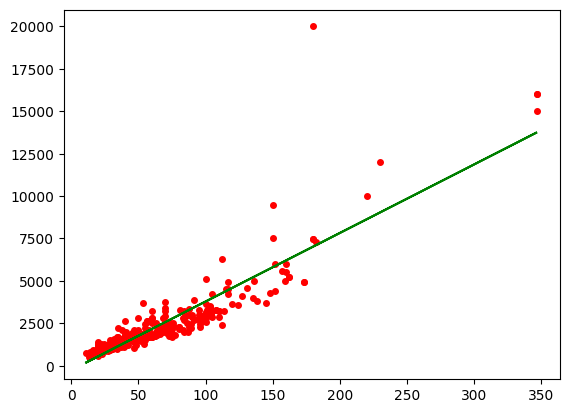

In [13]:
# Visualisation du modèle appris
plt.plot(X_train, y_train, 'ro', markersize=4)
plt.plot(X_train, lreg_model1.predict(X_train),color='g')

### 1.3 Evaluation du modèle

La fonction '<code>predict(X)</code>' réalise la prédiction, i.e. retourne les valeurs prédites par le modèle appris ('lreg_model1' dans notre cas) pour les exemples $X$ passés en argument. 


In [17]:
y_pred=lreg_model1.predict(X_test)
print(y_pred)

[  512.62382954  1158.86034184  2653.28227653   956.91143175
  5278.61810774  1118.47055982  3380.29835287  2249.38445634
   593.40339358  1885.87641818  3057.18009672  2895.62096864
  1199.25012386  2976.40053268  1441.58881597  1360.80925193
 13760.47233165  2249.38445634  3824.58595507  1926.2662002
  2653.28227653  3259.12900681  1603.14794405  1078.0807778
  2047.43554625  1926.2662002    876.13186771  1239.63990588
  2855.23118662  2976.40053268  4430.43268535   795.35230367
  2653.28227653   956.91143175  2168.60489231  1562.75816203
  4268.87355728  1562.75816203  1360.80925193  3137.95966075
  2087.82532827  1037.69099579 13760.47233165   754.96252166
  1966.65598221  2289.77423836  6813.42982445   553.01361156
  2814.84140461   795.35230367  2168.60489231  3905.36551911
  1239.63990588  4268.87355728   997.30121377  4349.65312131
  3380.29835287  1441.58881597  3097.56987874  2572.50271249
   593.40339358   956.91143175   553.01361156   835.74208569
  1158.86034184  2208.9946

On peut alors comparer les valeurs prédites $\hat{y}$ ('<code>y_pred</code>') avec les valeurs vraies $y$ pour estimer l'erreur commise par le modèle.

<font color="red">**Question 7:**</font> Rappelez la formule de l'erreur quadratique moyenne (MSE) et du coefficient de détermination $R^2$.

<font color="red">**Question 8:**</font> Quelle est la valeur prédite $\hat{y}^{(1)}$ pour le premier exemple de l'ensemble de test ? La valeur attendue $y^{(1)}$ ? Quel est la valeur de la contribution de cet exemple à la MSE ?

In [20]:
(list(y_test)[0]-y_pred[0])**2/len(y_pred)

180.753127047579

In [22]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean squared error: 815746.87
Coefficient of determination: 0.86
Mean squared error: 883901.18
Coefficient of determination: 0.80


<font color="red">**Question 9:**</font> Calculez l'erreur empirique (MSE et $R^2$).

<font color="red">**Question 10:**</font> Comparez les erreurs empiriques et réelles. Que constatez-vous ? Cela vous semble-t-il cohérent ? Justifiez votre réponse


In [23]:
# TODO: Calcul des erreurs empiriques
y_pred_train=lreg_model1.predict(X_train)

print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred_train))
print("Coefficient of determination: %.2f" % r2_score(y_train,y_pred_train))

Mean squared error: 883901.18
Coefficient of determination: 0.80


D'après l'analyse des données effectuées en première partie, on peut considérer que le modèle de prédiction linéaire n'est valable que pour les loyers inférieurs à 8 000€. Cela permet de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.
    
<font color="red">**Question 11:**</font> Constuire et évaluer le modèle de régression linéaire pour les loyers inférieurs à 8 000€. Le modèle est-il plus performant que sur l'ensemble des données ?

In [30]:
# sélection des données correspondant à un loyer inférieur à 8 000€
house_df_10000 = house_df[house_df['loyer'] < 8000]

X = house_df_10000.drop('loyer', axis=1)
y = house_df_10000['loyer']

test_size = 0.33
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=test_size, random_state=9)

# apprentissage du modèle
lreg_model2=LinearRegression()
lreg_model2.fit(X_train, y_train)
print("Estimated coefficients :",lreg_model2.coef_)
print("Independent term in the linear model :",lreg_model2.intercept_)

y_pred=lreg_model2.predict(X_test)

# réelle
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

# empirique
y_pred_train=lreg_model2.predict(X_train)

print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred_train))
print("Coefficient of determination: %.2f" % r2_score(y_train,y_pred_train))

Estimated coefficients : [29.59299291]
Independent term in the linear model : 306.6585551478174
Mean squared error: 270391.64
Coefficient of determination: 0.80
Mean squared error: 191202.84
Coefficient of determination: 0.86


## <font color="#1abc9c">2. Régression linéaire multivariée</font>


### 2.1 Analyse du jeu de données

Dans le même esprit que le jeu de données précédents, les données que nous allons utiliser ont été recueillies par le service de recensement des États-Unis concernant le logement dans la région de Boston. L'objectif est de prédire la valeur d'une maison, en fonction de certaines caractéristiques. 

Pour chaque bien immobilier, 14 données ont été recueillies :
- CRIM - taux de criminalité par habitant par ville
- ZN - proportion de terrains résidentiels zonés pour des lots de plus de 25 000 sq.ft.
- INDUS - proportion d'acres d'entreprises non commerciales par ville (acre = unité de mesure de superficie, 1 acre = 4046 m2)
- CHAS - Variable de Charles River (= 1 si la parcelle est bordée par une rivière ; 0 sinon)
- NOX - concentration d'oxydes nitriques (parts par 10 millions)
- RM - nombre moyen de pièces par logement
- AGE - proportion de logements construits avant 1940, occupés par leur propriétaire 
- DIS - distances pondérées par rapport à cinq centres d'emploi de Boston
- RAD - indice d'accessibilité aux autoroutes radiales
- TAX - taux d'imposition foncière sur la pleine valeur par 10 000 \$.
- PTRATIO - rapport élèves/professeurs par ville
- LSTAT - \% de la population dont le revenu est dans le premier Quartile des salaires dans cette région 
- MEDV - Valeur médiane des maisons occupées par leur propriétaire, en milliers de \$.

In [31]:
# Load Boston housing data set
boston_df = pd.read_csv("./data/boston.csv")

# View the features
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Il y a donc 13 variables explicatives pour le prix (MEDV). Avant de créer un modèle, on peut se poser les questions suivantes : doit-on conserver toutes ces variables pour le modèle ? Quelles sont les variables qui ont une forte relation linéaire avec la variable ‘MEDV’ ? 
Par ailleurs, la régression linéaire repose sur certaines hypothèses, notamment la non-colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison linéaire des autres).

Pour répondre à ces questions, on peut regarder la matrice de corrélation de Pearson.

<Axes: >

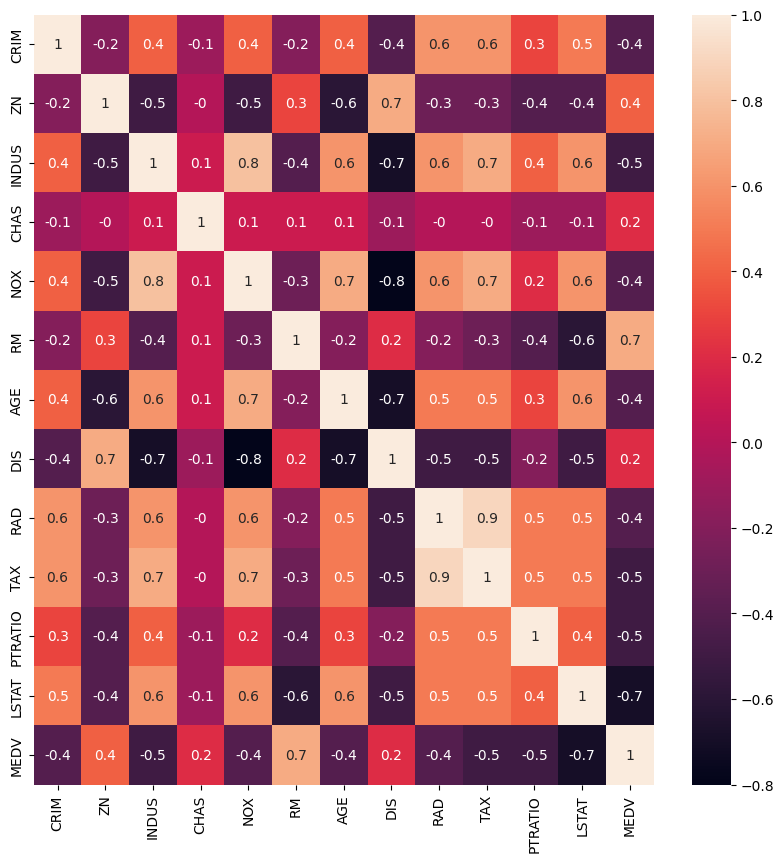

In [32]:
#etude de la correlation (arrondi à une décimale)
matrice_corr = boston_df.corr().round(1)
fig, ax = plt.subplots(figsize=(10, 10)) #specify size of heatmap
sns.heatmap(data=matrice_corr, annot=True)

<font color="red">**Question 1:**</font> Quelles sont les variables explicatives les plus corrélées avec la variable cible ?

<font color="red">**Question 2:**</font> Quelles sont les variables explicatives les plus corrélées entre elles ?

### 2.2 Regression linéaire avec 2 variables explicatives

Choisissez (judicieusement) 2 variables explicatives parmi les 13 proposées. (Ceci à des seules fins de visualisation)

Construisez la matrice d'attributs et le vecteur de la variable cible correspondant. Pour faire cela, il suffit de sélectionner les bonnes colonnes, identifiées par leur nom et les concaténer :
<code>
 X2 = pd.DataFrame(np.c_[boston_df['nom1'],boston_df['nom2']], columns = ['nom1','nom2'])   
</code>

In [33]:
# Define the X (input) and y (target) features
X2 = pd.DataFrame(np.c_[boston_df['RM'],boston_df['LSTAT']], columns = ['RM','LSTAT'])
y = boston_df["MEDV"]
print(X2.head())
print("\n",X2.describe())


      RM  LSTAT
0  6.575   4.98
1  6.421   9.14
2  7.185   4.03
3  6.998   2.94
4  7.147   5.33

                RM       LSTAT
count  506.000000  506.000000
mean     6.284634   12.653063
std      0.702617    7.141062
min      3.561000    1.730000
25%      5.885500    6.950000
50%      6.208500   11.360000
75%      6.623500   16.955000
max      8.780000   37.970000


Nous pouvons ensuite procéder à la séparation du jeu de données et l'apprentissage d'un modèle de régression linéaire.

<font color="red">**Question 3:**</font> Que devient maintenant l'équation du modèle et combien y'a-t-il à présent de paramètres dans le modèle ? 

In [34]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=test_size, random_state=15)
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

# Fit model to training set
lreg_model2=LinearRegression()
lreg_model2.fit(X2_train, y_train)
print("Estimated coefficients :",lreg_model2.coef_)
print("Independent term in the linear model :",lreg_model2.intercept_)

(339, 2)
(167, 2)
(339,)
(167,)
Estimated coefficients : [ 5.28127797 -0.63814919]
Independent term in the linear model : -2.700522543575623


<font color="red">**Question 4:**</font> Combien de données dans l'ensemble d'apprentissage et de test ?

<font color="red">**Question 5:**</font> Quelle est la valeur des paramètres estimés par l'apprentissage ?

<font color="red">**Question 6:**</font> Calculez "à la main" la valeur prédite par le modèle pour un exemple $\boldsymbol{x}$ dont vous choisirez (judicieusement) la valeur des composantes. Vous donnerez le détail du calcul.

In [36]:
x1=6.421
x2=9.14
-2.700522543575623 + 5.28127797 * x1 - 0.63814919 * x2 #21.6

25.377879705194374

/home/aquabx/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


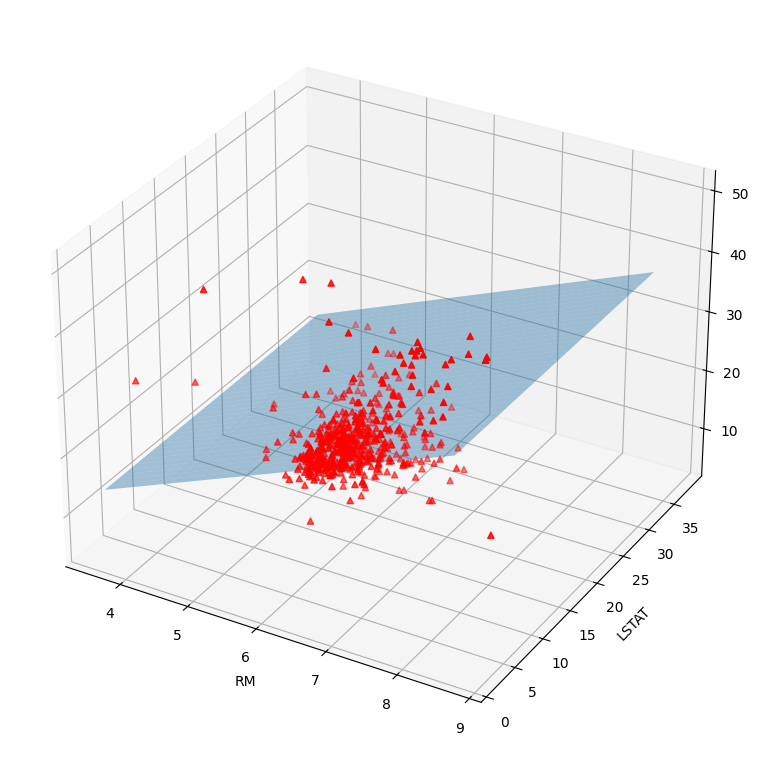

In [37]:
# Visualisation du modèle
tpiia_utils.plot_2d_regression_model(lreg_model2,X2,y)


In [38]:
# Evaluation du modele
y2_pred=lreg_model2.predict(X2_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y2_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y2_pred))

Mean squared error: 33.72
Coefficient of determination: 0.61


<font color="red">**Question 7:**</font> le modèle vous semble-t-il performant ?

### 2.3 Regression linéaire avec toutes les variables explicatives

On regarde maintenant ce qui se passe si on conserve toutes les variables explicatives.

In [39]:
# Define the X (input) and y (target) features
X = boston_df.drop("MEDV", axis=1)
y = boston_df["MEDV"]
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  


In [40]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5)

# Fit model to training set
lreg_model=LinearRegression()
lreg_model.fit(X_train, y_train)
print("Estimated coefficients :",lreg_model.coef_)
print("Independent term in the linear model :",lreg_model.intercept_)


Estimated coefficients : [-1.49654723e-01  3.88363812e-02 -4.02259619e-02  1.03091538e+00
 -1.23509631e+01  3.77934934e+00 -9.55865132e-03 -1.34999116e+00
  3.05300952e-01 -1.41468785e-02 -9.73493318e-01 -5.08108392e-01]
Independent term in the linear model : 38.95087215850717


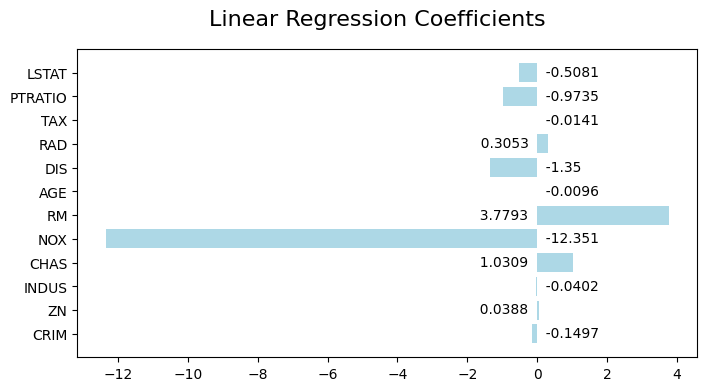

In [41]:
# Visualisation du modèle
tpiia_utils.linearRegressionSummary(lreg_model, X.columns)

<font color="red">**Question 8:**</font> Quelles sont les variables qui ont le plus d'importance/d'influence dans le modèle ?

In [42]:
# Evaluate model
y_pred=lreg_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean squared error: 28.19
Coefficient of determination: 0.70
